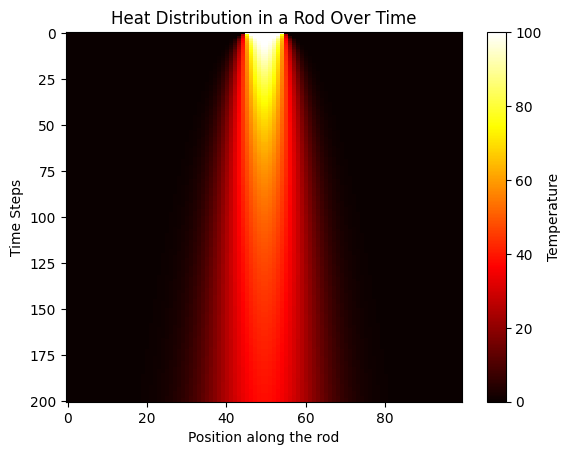

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
length_of_rod = 10  # length of the rod
num_points = 100  # number of discrete points along the rod
dx = length_of_rod / num_points  # distance between points
alpha = 0.01  # thermal diffusivity
dt = (dx ** 2) / (4 * alpha)  # time step size (stability condition)
time_steps = 200  # number of time steps

# Initial temperature distribution (e.g., middle of the rod is hot)
temperature = np.zeros(num_points)
mid_point = num_points // 2
temperature[mid_point-5:mid_point+5] = 100

# Record initial temperature
temperature_evolution = [temperature.copy()]

# Time evolution
for _ in range(time_steps):
    new_temperature = temperature.copy()
    for i in range(1, num_points - 1):
        new_temperature[i] = temperature[i] + alpha * dt / dx**2 * (temperature[i+1] - 2*temperature[i] + temperature[i-1])
    temperature = new_temperature
    temperature_evolution.append(temperature.copy())

# Converting list to numpy array for easier plotting
temperature_evolution = np.array(temperature_evolution)

# Plotting
plt.imshow(temperature_evolution, cmap='hot', interpolation='nearest', aspect='auto')
plt.colorbar(label='Temperature')
plt.xlabel('Position along the rod')
plt.ylabel('Time Steps')
plt.title('Heat Distribution in a Rod Over Time')
plt.show()


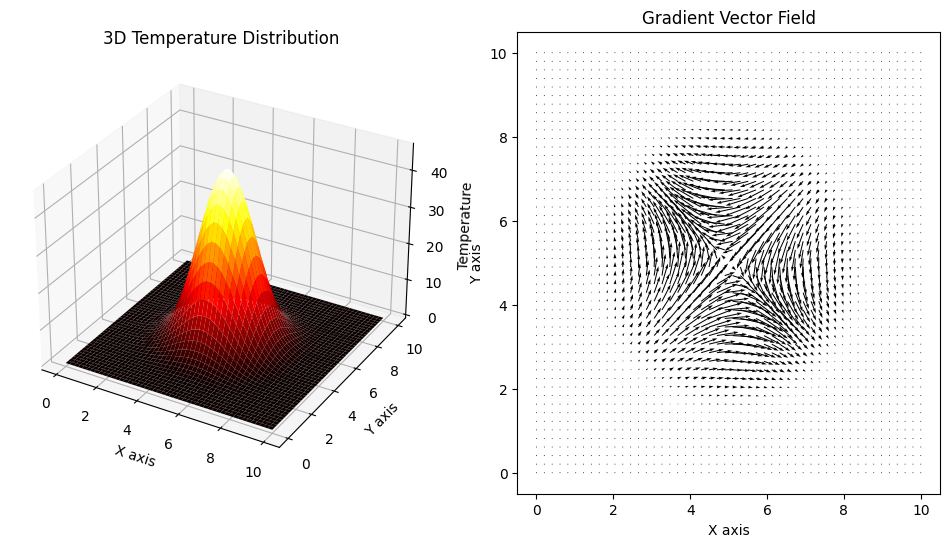

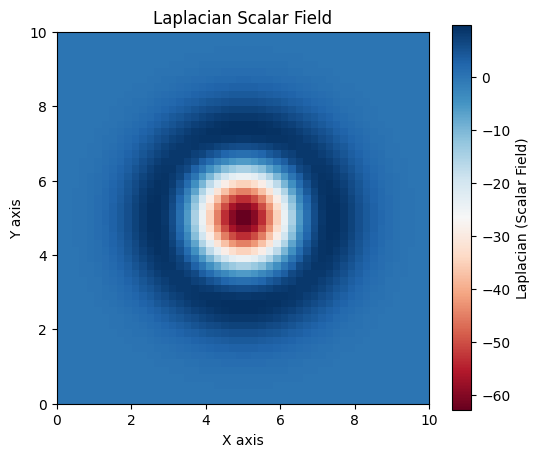

In [6]:
from mpl_toolkits.mplot3d import Axes3D

# Parameters for the 2D plate
plate_length = 10
plate_width = 10
num_points_x = 50
num_points_y = 50
dx = plate_length / num_points_x
dy = plate_width / num_points_y
alpha = 0.01
dt = (dx ** 2) / (4 * alpha)
time_steps = 50

# Initial temperature distribution (hotter in the center)
temperature_plate = np.zeros((num_points_x, num_points_y))
center_x, center_y = num_points_x // 2, num_points_y // 2
temperature_plate[center_x-5:center_x+5, center_y-5:center_y+5] = 100

# Heat distribution over time
for _ in range(time_steps):
    new_temperature = temperature_plate.copy()
    for i in range(1, num_points_x - 1):
        for j in range(1, num_points_y - 1):
            new_temperature[i, j] = temperature_plate[i, j] + alpha * dt / dx**2 * (
                    temperature_plate[i+1, j] + temperature_plate[i-1, j] +
                    temperature_plate[i, j+1] + temperature_plate[i, j-1] - 4*temperature_plate[i, j])
    temperature_plate = new_temperature

# 3D Plot of the temperature distribution
x = np.linspace(0, plate_length, num_points_x)
y = np.linspace(0, plate_width, num_points_y)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, temperature_plate, cmap='hot')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Temperature')
ax.set_title('3D Temperature Distribution')

# Gradient vector field
grad_x, grad_y = np.gradient(temperature_plate, dx, dy)
ax2 = fig.add_subplot(1, 2, 2)
Q = ax2.quiver(X, Y, grad_x, grad_y)
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_title('Gradient Vector Field')
plt.show()

# Compute and visualize the Laplacian scalar field
laplacian = np.gradient(grad_x, dx, axis=0) + np.gradient(grad_y, dy, axis=1)
plt.figure(figsize=(6, 5))
plt.imshow(laplacian, extent=[0, plate_length, 0, plate_width], cmap='RdBu', origin='lower')
plt.colorbar(label='Laplacian (Scalar Field)')
plt.title('Laplacian Scalar Field')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()


In [12]:
%matplotlib qt
import matplotlib.animation as animation

# Reinitializing the temperature distribution for the simulation
temperature_plate = np.zeros((num_points_x, num_points_y))
temperature_plate[center_x-5:center_x+5, center_y-5:center_y+5] = 100

# Function to update the temperature distribution for each frame in the animation
# Adjusting the code to fix the axes in the animation

def update_heat_distribution_fixed_axes(frame, temperature_plate, plot_temperature, plot_gradient, plot_laplacian):
    # Update the temperature based on the heat equation
    new_temperature = temperature_plate.copy()
    for i in range(1, num_points_x - 1):
        for j in range(1, num_points_y - 1):
            new_temperature[i, j] = temperature_plate[i, j] + alpha * dt / dx**2 * (
                    temperature_plate[i+1, j] + temperature_plate[i-1, j] +
                    temperature_plate[i, j+1] + temperature_plate[i, j-1] - 4*temperature_plate[i, j])

    # Update the temperature plate
    temperature_plate[:] = new_temperature

    # Update the 3D temperature plot
    plot_temperature[0].remove()
    plot_temperature[0] = ax1.plot_surface(X, Y, temperature_plate, cmap='hot')

    # Update the gradient vector field
    grad_x, grad_y = np.gradient(temperature_plate, dx, dy)
    plot_gradient.set_UVC(grad_x, grad_y)

    # Update the Laplacian scalar field
    laplacian = np.gradient(grad_x, dx, axis=0) + np.gradient(grad_y, dy, axis=1)
    plot_laplacian[0].remove()
    plot_laplacian[0] = ax3.plot_surface(X, Y, laplacian, cmap='RdBu')

# Creating figure and axes for the animation with fixed axes
fig = plt.figure(figsize=(18, 6))

# 3D Temperature Distribution Plot with fixed axes
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
temp_plot = [ax1.plot_surface(X, Y, temperature_plate, cmap='hot')]
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Temperature')
ax1.set_title('3D Temperature Distribution')
ax1.set_zlim(0, 100)

# Gradient Vector Field Plot with fixed axes
ax2 = fig.add_subplot(1, 3, 2)
grad_x, grad_y = np.gradient(temperature_plate, dx, dy)
Q = ax2.quiver(X, Y, grad_x, grad_y)
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_title('Gradient Vector Field')

# Laplacian Scalar Field 3D Plot with fixed axes
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
laplacian = np.gradient(grad_x, dx, axis=0) + np.gradient(grad_y, dy, axis=1)
laplacian_plot = [ax3.plot_surface(X, Y, laplacian, cmap='RdBu')]
ax3.set_xlabel('X axis')
ax3.set_ylabel('Y axis')
ax3.set_zlabel('Laplacian')
ax3.set_title('Laplacian Scalar Field')
ax3.set_zlim(-10, 10)

# Creating the animation with fixed axes
ani = animation.FuncAnimation(fig, update_heat_distribution_fixed_axes, fargs=(temperature_plate, temp_plot, Q, laplacian_plot),
                              frames=50, interval=200)

plt.tight_layout()
plt.show()


# ODE VS PDE

In [16]:
# PDE Example: Heat Equation in 1D

# Solving the heat equation using the finite difference method

def solve_heat_equation(initial_temp_dist, alpha, dx, dt, num_time_steps):
    """Solve the heat equation in 1D using finite differences."""
    # Initialize the temperature distribution
    temp_dist = initial_temp_dist.copy()
    num_x_points = len(temp_dist)

    # Time evolution
    for _ in range(num_time_steps):
        new_temp_dist = temp_dist.copy()
        for i in range(1, num_x_points - 1):
            new_temp_dist[i] = temp_dist[i] + alpha * dt / dx**2 * (temp_dist[i+1] - 2*temp_dist[i] + temp_dist[i-1])
        temp_dist = new_temp_dist

    return temp_dist

# Parameters for the 1D heat equation
L = 10  # length of the rod
dx = 0.1  # distance between points
alpha = 0.01  # thermal diffusivity
dt = (dx ** 2) / (4 * alpha)  # time step size
num_time_steps = 1000  # number of time steps

# Initial temperature distribution (e.g., hotter in the middle)
initial_temp_dist = np.zeros(int(L / dx))
mid_point = len(initial_temp_dist) // 2
initial_temp_dist[mid_point-5:mid_point+5] = 100

# Solving the heat equation
final_temp_dist = solve_heat_equation(initial_temp_dist, alpha, dx, dt, num_time_steps)

# Plotting the PDE solution
x = np.linspace(0, L, int(L / dx))
plt.figure(figsize=(10, 4))
plt.plot(x, initial_temp_dist, label='Initial Temperature')
plt.plot(x, final_temp_dist, label='Final Temperature after 1000 time steps')
plt.title('PDE Solution: Heat Equation in 1D')
plt.xlabel('Position along the rod')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
# PDE with varied initial conditions

# Function to evolve the temperature distribution over time
def evolve_temperature(initial_temp_dist, alpha, dx, dt, num_time_steps):
    """Evolve the temperature distribution over time."""
    temp_dist = [initial_temp_dist.copy()]
    for _ in range(num_time_steps):
        new_temp_dist = temp_dist[-1].copy()
        for i in range(1, len(new_temp_dist) - 1):
            new_temp_dist[i] = temp_dist[-1][i] + alpha * dt / dx**2 * (
                    temp_dist[-1][i+1] - 2*temp_dist[-1][i] + temp_dist[-1][i-1])
        temp_dist.append(new_temp_dist)
    return temp_dist

# Different initial temperature distributions
initial_temp_dists = [
    np.zeros(int(L / dx)),  # All zero
    np.linspace(0, 100, int(L / dx)),  # Linear gradient
    np.concatenate([np.linspace(0, 100, int(L / dx) // 2), np.linspace(100, 0, int(L / dx) // 2)])  # Triangle
]

# Evolving each temperature distribution over time
evolutions = [evolve_temperature(dist, alpha, dx, dt, 200) for dist in initial_temp_dists]

# Plotting the final temperature distribution for each initial condition
plt.figure(figsize=(10, 6))
for i, evolution in enumerate(evolutions):
    plt.plot(x, evolution[0], label=f'Initial Condition {i+1}')
    plt.plot(x, evolution[-1], label=f'Final Condition {i+1}', linestyle='--')
plt.title('PDE Solutions: Heat Equation with Different Initial Conditions')
plt.xlabel('Position along the rod')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# ODE Vector Field Visualization

# Defining the ODE system
def ODE_system(state, t=0):
    x, y = state
    dx_dt = x - y
    dy_dt = x + y
    return [dx_dt, dy_dt]

# Creating a grid of points for vector field
x_values = np.linspace(-10, 10, 20)
y_values = np.linspace(-10, 10, 20)
X, Y = np.meshgrid(x_values, y_values)

# Calculating the rate of change at each point
U, V = np.zeros(X.shape), np.zeros(Y.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x, y = X[i, j], Y[i, j]
        U[i, j], V[i, j] = ODE_system([x, y])

# Plotting the vector field
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, angles='xy')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Vector Field of the ODE System')
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.grid()
plt.show()
